In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy

# Import API key
from config import api_key

In [11]:
# CSV Output
data_csv_file = "data_csv/output.csv"

# Latitudes and longitudes range
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
# Latitudes, longitudes and cities list 
lat_longs = []
cities = []

# Random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

# Nearest city for each combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # Add to cities list if unique city
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [13]:
city_list = []
countries = []
lat = []
long = []
cloudiness = []
date = []
humidity = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [14]:
print("Beginning Data Retrieval ")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Retrieve the following attributes for each city
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("DATA PULL COMPLETE")



Beginning Data Retrieval 
Processing Record 1 of Set 1 : tasiilaq
City not found. Skipping...
Processing Record 2 of Set 1 : port alfred
Processing Record 3 of Set 1 : albany
Processing Record 4 of Set 1 : khandyga
Processing Record 5 of Set 1 : northam
Processing Record 6 of Set 1 : lazaro cardenas
Processing Record 7 of Set 1 : vaini
Processing Record 8 of Set 1 : atuona
Processing Record 9 of Set 1 : punta arenas
Processing Record 10 of Set 1 : guarapari
Processing Record 11 of Set 1 : saint-francois
Processing Record 12 of Set 1 : ukiah
City not found. Skipping...
Processing Record 13 of Set 1 : hami
Processing Record 14 of Set 1 : los llanos de aridane
Processing Record 15 of Set 1 : meulaboh
Processing Record 16 of Set 1 : hasaki
Processing Record 17 of Set 1 : qaanaaq
Processing Record 18 of Set 1 : nikolskoye
Processing Record 19 of Set 1 : sayula
City not found. Skipping...
Processing Record 20 of Set 1 : thompson
Processing Record 21 of Set 1 : camacha
Processing Record 22 of

Processing Record 37 of Set 4 : takaoka
Processing Record 38 of Set 4 : esperance
Processing Record 39 of Set 4 : pouebo
Processing Record 40 of Set 4 : sur
City not found. Skipping...
Processing Record 41 of Set 4 : nakhon nayok
Processing Record 42 of Set 4 : simao
Processing Record 43 of Set 4 : yeppoon
Processing Record 44 of Set 4 : erenhot
Processing Record 45 of Set 4 : san patricio
Processing Record 46 of Set 4 : aklavik
Processing Record 47 of Set 4 : shamary
Processing Record 48 of Set 4 : slave lake
Processing Record 49 of Set 4 : dali
Processing Record 50 of Set 4 : grindavik
Processing Record 0 of Set 5 : kamaishi
Processing Record 1 of Set 5 : olafsvik
Processing Record 2 of Set 5 : waipawa
Processing Record 3 of Set 5 : port blair
Processing Record 4 of Set 5 : constitucion
Processing Record 5 of Set 5 : pandan
Processing Record 6 of Set 5 : owerri
Processing Record 7 of Set 5 : novozybkov
Processing Record 8 of Set 5 : fortuna
Processing Record 9 of Set 5 : coracora
Pro

Processing Record 21 of Set 8 : maarianhamina
Processing Record 22 of Set 8 : parkersburg
Processing Record 23 of Set 8 : ribas do rio pardo
Processing Record 24 of Set 8 : dunmore east
Processing Record 25 of Set 8 : vysokogornyy
City not found. Skipping...
Processing Record 26 of Set 8 : jijiga
Processing Record 27 of Set 8 : aswan
Processing Record 28 of Set 8 : ixtapa
Processing Record 29 of Set 8 : turan
Processing Record 30 of Set 8 : avera
Processing Record 31 of Set 8 : mana
Processing Record 32 of Set 8 : codrington
Processing Record 33 of Set 8 : ploemeur
Processing Record 34 of Set 8 : lincoln
Processing Record 35 of Set 8 : dimbokro
Processing Record 36 of Set 8 : neuquen
Processing Record 37 of Set 8 : lae
City not found. Skipping...
Processing Record 38 of Set 8 : harer
Processing Record 39 of Set 8 : ossora
Processing Record 40 of Set 8 : pisco
Processing Record 41 of Set 8 : salalah
Processing Record 42 of Set 8 : tabuk
Processing Record 43 of Set 8 : christchurch
Proce

In [15]:
# Convert retrieved data into a pandas df
data_dict = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloudiness,
                "Country" : countries,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : long,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

# Count data
data_dict.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [16]:
data_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,98,GL,1624473168,68,65.6145,-37.6368,8.09,1.92
1,Port Alfred,92,ZA,1624473169,74,-33.5906,26.8910,16.88,6.05
2,Albany,5,US,1624473009,43,42.6001,-73.9662,22.67,0.45
3,Khandyga,100,RU,1624473169,81,62.6667,135.6000,15.00,2.24
4,Northam,100,GB,1624473170,86,51.0333,-4.2167,16.68,2.07
...,...,...,...,...,...,...,...,...,...
552,Adré,100,TD,1624473412,52,13.4667,22.2000,25.51,3.31
553,Leshukonskoye,97,RU,1624473413,86,64.8989,45.7622,18.98,3.99
554,Chignahuapan,100,MX,1624473413,72,19.8333,-98.0333,19.02,2.04
555,Vryburg,5,ZA,1624473414,50,-26.9566,24.7284,11.68,3.18


In [18]:
# Save data to csv
data_dict.to_csv("data_csv/output.csv", index = False)

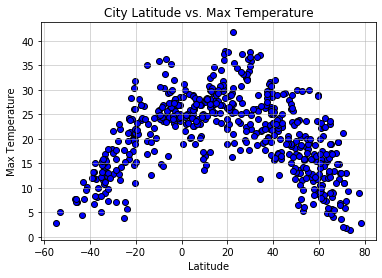

In [22]:
# Scatter Plot - Latitude vs. Temperature
plt.scatter(data_dict["Lat"], data_dict["Max Temp"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save plot at png
plt.savefig("Images/City Latitude vs Max Temperature.png")

